In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers, models, datasets, utils, Input
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [4]:
print(f"X-Train Shape: {x_train.shape}")
print(f"X-Test Shape: {x_test.shape}")
print(f"Y-Train Shape: {y_train.shape}")
print(f"Y-Test Shape: {y_test.shape}")

X-Train Shape: (60000, 28, 28)
X-Test Shape: (10000, 28, 28)
Y-Train Shape: (60000,)
Y-Test Shape: (10000,)


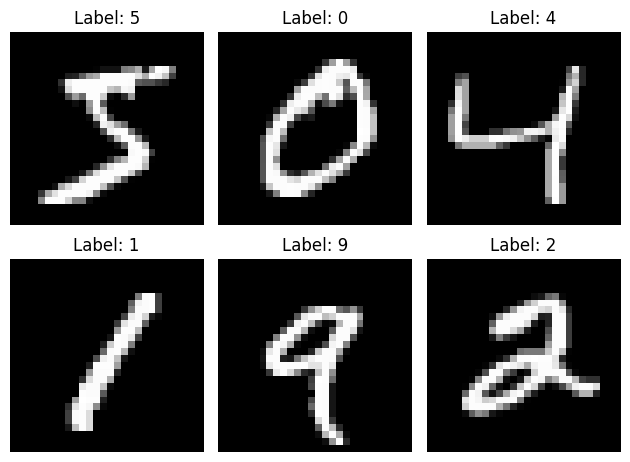

In [5]:
fig, ax = plt.subplots(2, 3)
ax = ax.flatten()

for i in range(6):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].set_title(f"Label: {y_train[i]}")
    ax[i].axis("off")

plt.tight_layout()
plt.show()

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
model = models.Sequential([
    Input(shape=(784,)),
    layers.Dense(128, activation="relu"), 
    layers.Dense(64, activation="relu"),                    
    layers.Dense(10, activation="softmax")                   
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9204 - loss: 0.2690 - val_accuracy: 0.9578 - val_loss: 0.1380
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9654 - loss: 0.1146 - val_accuracy: 0.9682 - val_loss: 0.1026
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0781 - val_accuracy: 0.9680 - val_loss: 0.1083
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0598 - val_accuracy: 0.9718 - val_loss: 0.0940
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0474 - val_accuracy: 0.9717 - val_loss: 0.0973
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9884 - loss: 0.0375 - val_accuracy: 0.9721 - val_loss: 0.1041
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9896 - loss: 0.0310 - val_accuracy: 0.9697 - val_loss: 0.1123
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0255 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9776 - loss: 0.0954
Test Accuracy: 0.9776, Test Loss: 0.0954


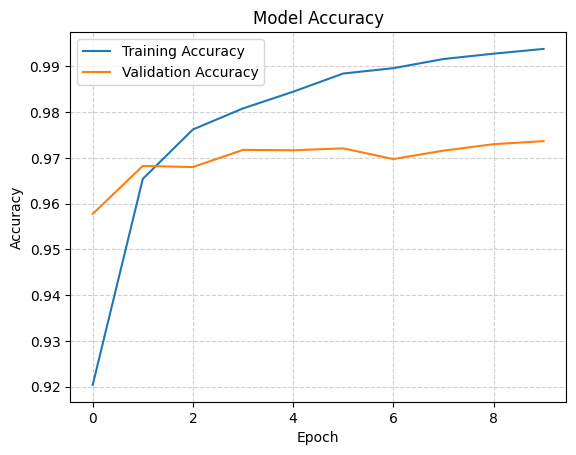

In [ ]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(linestyle="--", alpha=0.6)
plt.legend()
plt.show()

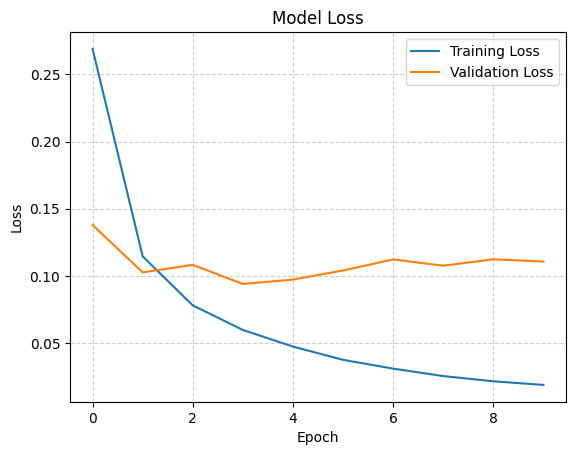

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(linestyle="--", alpha=0.6)
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Predicted:", y_pred_classes[:20])
print("True:     ", y_true[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
Predicted: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True:      [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


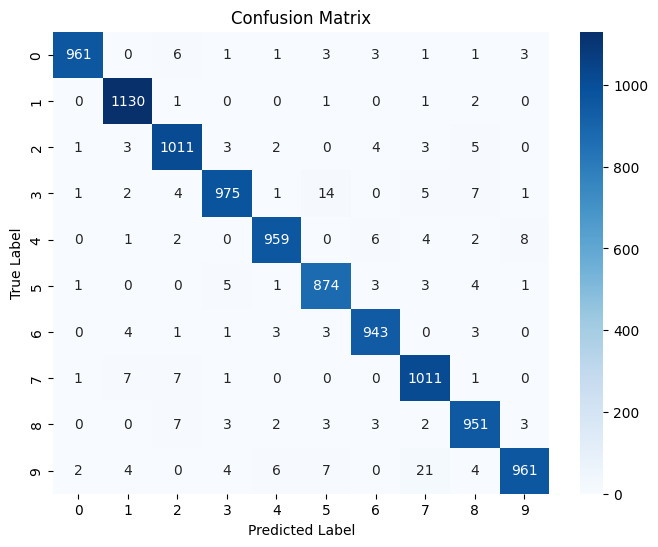

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Number of misclassified samples: 224
First 5 misclassified indices: [ 20 149 151 247 321]


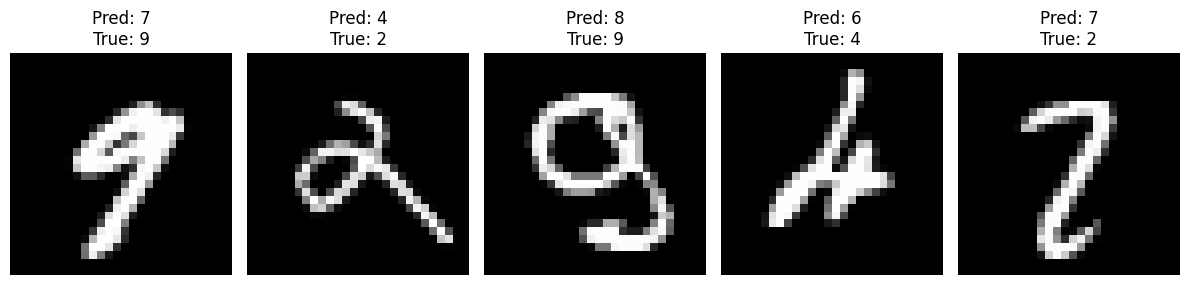

In [ ]:
wrong_indices = np.where(y_pred_classes != y_true)[0]

print(f"Number of misclassified samples: {len(wrong_indices)}")
print(f"First 5 misclassified indices: {wrong_indices[:5]}")

fig, axes = plt.subplots(1, 5, figsize=(12, 6))

for i, idx in enumerate(wrong_indices[:5]):
    axes[i].imshow(x_test[idx].reshape(28,28), cmap="gray")
    axes[i].set_title(f"Pred: {y_pred_classes[idx]}\nTrue: {y_true[idx]}")
    axes[i].axis("off")
    
plt.tight_layout()
plt.show()